In [1]:
!pip install -q kaggle
from google.colab import files
files.upload()
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json
!kaggle datasets download -d aishjun/nba-salaries-prediction-in-20172018-season

Saving kaggle.json to kaggle.json
  0% 0.00/27.3k [00:00<?, ?B/s]
100% 27.3k/27.3k [00:00<00:00, 22.3MB/s]


In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df=pd.read_csv('/content/nba-salaries-prediction-in-20172018-season.zip')

In [5]:
null_values_col =df.isnull().sum()
null_values_col = null_values_col[null_values_col != 0].sort_values(ascending = False).reset_index()
null_values_col.columns = ["variable", "number of missing"]
null_values_col.head()

,variable,number of missing
0,TOV%,2
1,FTr,2
2,3PAr,2
3,TS%,2


In [6]:
def fillWithMedian(df):
    return df.fillna(df.median(), inplace=True)

fillWithMedian(df)

In [7]:
df.isnull().any()

Player             False
Salary             False
NBA_Country        False
NBA_DraftNumber    False
Age                False
Tm                 False
G                  False
MP                 False
PER                False
TS%                False
3PAr               False
FTr                False
ORB%               False
DRB%               False
TRB%               False
AST%               False
STL%               False
BLK%               False
TOV%               False
USG%               False
OWS                False
DWS                False
WS                 False
WS/48              False
OBPM               False
DBPM               False
BPM                False
VORP               False
dtype: bool

In [8]:
df.describe()

,Salary,NBA_DraftNumber,Age,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
count,4.850000e+02,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000,485.000000
mean,6.636507e+06,29.451546,26.263918,50.167010,1154.142268,13.260825,0.535427,0.337419,0.263270,4.873814,14.950722,9.908247,12.947835,1.529485,1.713196,13.137732,18.897320,1.275464,1.176495,2.455258,0.079959,-1.270722,-0.489485,-1.760206,0.598763
std,7.392602e+06,21.125760,4.272297,24.874872,811.357419,8.769280,0.112121,0.226425,0.293976,4.582810,6.847530,4.956436,9.112408,0.989562,1.683792,6.102780,5.940536,1.881444,1.034580,2.673670,0.162992,5.026275,2.389343,5.661447,1.245653
min,4.608000e+04,1.000000,19.000000,1.000000,1.000000,-41.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.300000,0.000000,-1.200000,-1.063000,-36.500000,-14.300000,-49.200000,-1.300000
25%,1.471382e+06,11.000000,23.000000,29.000000,381.000000,9.800000,0.506000,0.167000,0.155000,1.800000,10.200000,6.200000,6.900000,1.000000,0.600000,9.900000,15.000000,0.000000,0.300000,0.300000,0.040000,-2.700000,-1.700000,-3.600000,-0.100000
50%,3.202217e+06,25.000000,26.000000,59.000000,1134.000000,13.200000,0.545000,0.346000,0.231000,3.200000,14.000000,8.700000,9.900000,1.500000,1.200000,12.500000,17.900000,0.800000,1.000000,1.800000,0.083000,-1.100000,-0.400000,-1.300000,0.100000
75%,1.000000e+07,47.000000,29.000000,71.000000,1819.000000,16.500000,0.582000,0.480000,0.319000,7.000000,18.800000,13.300000,17.600000,1.900000,2.200000,15.700000,22.200000,2.000000,1.800000,3.600000,0.123000,0.400000,1.000000,0.500000,0.900000
max,3.468255e+07,62.000000,41.000000,79.000000,2898.000000,134.100000,1.500000,1.000000,5.333000,35.900000,37.600000,26.500000,49.400000,12.500000,13.400000,66.700000,45.100000,11.400000,5.600000,15.000000,2.713000,68.700000,6.800000,54.400000,8.600000


In [9]:
df.head(10)

,Player,Salary,NBA_Country,NBA_DraftNumber,Age,Tm,G,MP,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Zhou Qi,815615,China,43,22,HOU,16,87,0.6,0.303,0.593,0.370,6.5,16.8,11.7,1.5,1.1,6.8,18.2,19.5,-0.4,0.1,-0.2,-0.121,-10.6,0.5,-10.1,-0.2
1,Zaza Pachulia,3477600,Georgia,42,33,GSW,66,937,16.8,0.608,0.004,0.337,11.0,25.0,18.5,15.4,1.9,1.3,19.3,17.2,1.7,1.4,3.1,0.160,-0.6,1.3,0.8,0.7
2,Zach Randolph,12307692,USA,19,36,SAC,59,1508,17.3,0.529,0.193,0.140,7.0,23.8,15.0,14.9,1.4,0.6,12.5,27.6,0.3,1.1,1.4,0.046,-0.6,-1.3,-1.9,0.0
3,Zach LaVine,3202217,USA,13,22,CHI,24,656,14.6,0.499,0.346,0.301,1.4,14.4,7.7,18.6,1.8,0.5,9.7,29.5,-0.1,0.5,0.4,0.027,-0.7,-2.0,-2.6,-0.1
4,Zach Collins,3057240,USA,10,20,POR,62,979,8.2,0.487,0.387,0.146,4.9,18.3,11.7,7.3,0.8,2.5,15.6,15.5,-0.4,1.2,0.8,0.038,-3.7,0.9,-2.9,-0.2
5,Yogi Ferrell,1312611,USA,62,24,DAL,79,2238,11.5,0.543,0.489,0.141,1.3,11.3,6.1,13.3,1.4,0.3,9.1,17.0,1.6,1.6,3.1,0.067,-0.4,-0.5,-0.9,0.6
6,Xavier Silas,74159,USA,62,30,BOS,2,7,-4.9,0.000,0.667,0.000,15.9,15.4,15.7,0.0,7.2,0.0,0.0,19.2,-0.1,0.0,0.0,-0.251,-12.6,-0.7,-13.3,0.0
7,Xavier Rathan-Mayes,46080,Canada,62,23,MEM,5,118,0.9,0.315,0.333,0.214,0.0,5.0,2.5,23.2,2.6,2.4,19.3,21.7,-0.5,0.1,-0.4,-0.169,-8.7,-1.9,-10.6,-0.3
8,Wilson Chandler,12016854,USA,23,30,DEN,70,2200,11.1,0.543,0.390,0.186,5.0,14.0,9.5,9.7,0.9,1.4,12.0,14.6,2.0,1.0,3.1,0.067,-0.4,-0.6,-1.0,0.5
9,Willy Hernangomez,1435750,Spain,35,23,TOT,45,430,20.6,0.592,0.075,0.555,13.6,25.2,19.3,11.0,1.8,2.8,15.4,21.7,0.8,0.6,1.4,0.156,-0.1,0.6,0.5,0.3


In [10]:
df.shape

(485, 28)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485 entries, 0 to 484
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Player           485 non-null    object 
 1   Salary           485 non-null    int64  
 2   NBA_Country      485 non-null    object 
 3   NBA_DraftNumber  485 non-null    int64  
 4   Age              485 non-null    int64  
 5   Tm               485 non-null    object 
 6   G                485 non-null    int64  
 7   MP               485 non-null    int64  
 8   PER              485 non-null    float64
 9   TS%              485 non-null    float64
 10  3PAr             485 non-null    float64
 11  FTr              485 non-null    float64
 12  ORB%             485 non-null    float64
 13  DRB%             485 non-null    float64
 14  TRB%             485 non-null    float64
 15  AST%             485 non-null    float64
 16  STL%             485 non-null    float64
 17  BLK%            

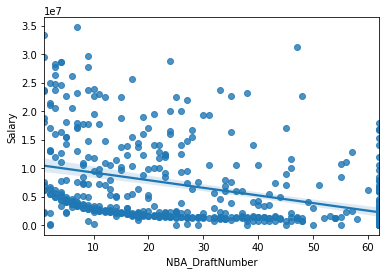

In [12]:
ax=sns.regplot(x='NBA_DraftNumber',y='Salary',data=df)

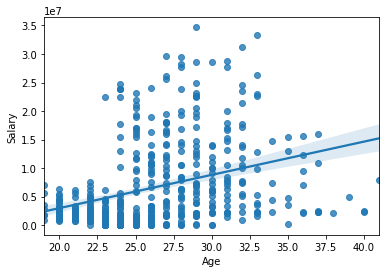

In [13]:
ax=sns.regplot(x='Age',y='Salary',data=df)

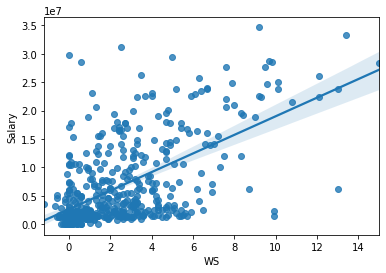

In [14]:
ax=sns.regplot(x='WS',y='Salary',data=df)

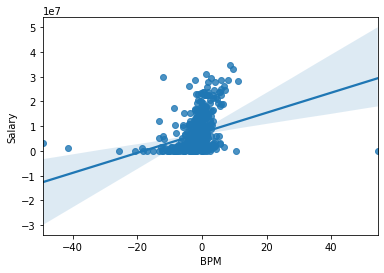

In [15]:
ax=sns.regplot(x='BPM',y='Salary',data=df)

In [36]:
x = df[['NBA_DraftNumber', 'Age', 'WS', 'BPM']]
y = df[['Salary']]

In [37]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=1)

In [38]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import Adam
model=keras.Sequential([keras.layers.Dense(4,activation=tf.nn.relu,input_shape=[4,]),
                        keras.layers.Dense(4,activation=tf.nn.relu),
                        keras.layers.Dense(1)])

In [39]:
model.compile(loss='mean_squared_error', optimizer=Adam(0.1))
history = model.fit(x_train,y_train,validation_split=0.25, epochs=70)

Epoch 1/70
10/10 [==============================] - 0s 12ms/step - loss: 103842091892736.0000 - val_loss: 106892382699520.0000
Epoch 2/70
10/10 [==============================] - 0s 7ms/step - loss: 103807841206272.0000 - val_loss: 106813445898240.0000
Epoch 3/70
10/10 [==============================] - 0s 5ms/step - loss: 103670939123712.0000 - val_loss: 106570948018176.0000
Epoch 4/70
10/10 [==============================] - 0s 5ms/step - loss: 103310279311360.0000 - val_loss: 105995430789120.0000
Epoch 5/70
10/10 [==============================] - 0s 5ms/step - loss: 102482810241024.0000 - val_loss: 104859479048192.0000
Epoch 6/70
10/10 [==============================] - 0s 5ms/step - loss: 100990543986688.0000 - val_loss: 102936407441408.0000
Epoch 7/70
10/10 [==============================] - 0s 5ms/step - loss: 98568719302656.0000 - val_loss: 100072041742336.0000
Epoch 8/70
10/10 [==============================] - 0s 5ms/step - loss: 95228778250240.0000 - val_loss: 96232592637952

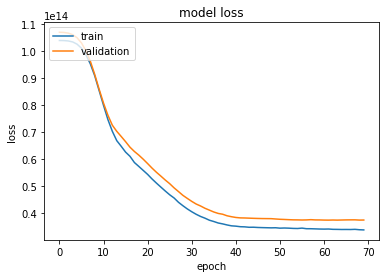

In [40]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [41]:
print(model.predict([[23,30,3.1,-1.0]]))

[[9761811.]]


In [42]:
print('Coefficients: \n',model.get_weights())

Coefficients: 
 [array([[-11.496659 ,  -8.169276 ,  -7.7659354,  -7.866935 ],
       [ 28.248365 ,  28.372217 ,  28.41985  ,  29.047834 ],
       [ 55.27814  ,  53.57438  ,  53.455402 ,  53.861862 ],
       [ 26.707664 ,  26.416992 ,  24.403753 ,  26.630997 ]],
      dtype=float32), array([20.813534, 21.40937 , 21.77994 , 21.774385], dtype=float32), array([[32.750626  , 32.327366  , 32.081127  , -0.6502168 ],
       [30.958435  , 31.68723   , 31.837732  , -0.08554533],
       [30.883215  , 30.857315  , 30.108942  , -1.0983744 ],
       [30.776522  , 31.136099  , 30.958239  , -0.76517874]],
      dtype=float32), array([18.460463 , 18.938667 , 18.64128  , -0.8282541], dtype=float32), array([[32.110096  ],
       [31.432875  ],
       [31.934683  ],
       [-0.14517501]], dtype=float32), array([12.409287], dtype=float32)]


In [43]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
y_prediction=model.predict(x_test)
print(r2_score(y_prediction,y_test))
print(mean_absolute_error(y_prediction,y_test))
print(mean_squared_error(y_prediction,y_test))

-0.27475028120710654
3823371.6270286324
23352672020601.414


Text(0, 0.5, 'Y Predicted')

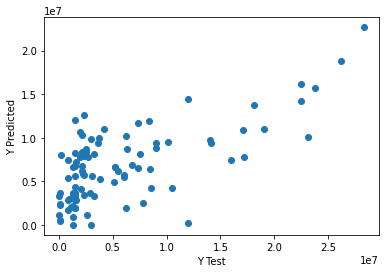

In [44]:
plt.scatter(y_test,y_prediction)
plt.xlabel('Y Test')
plt.ylabel('Y Predicted')